In [3]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset heart_disease.xlsx
df=pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df.shape

(908, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#Statistical Snapshot
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


In [8]:
# Check missing values per column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
# Impute oldpeak with median
df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].median())

The `chol` column has ~178 zero values indicating unrecorded/unknown cholesterol readings rather than missing data.

The `num` column has ~399 zeros representing absence of heart disease, so both are valid values and retained.


In [10]:
df.sample(30) # random sample of rows or columns from a DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
880,58,Male,asymptomatic,114,318,False,st-t abnormality,140,False,4.4,downsloping,fixed defect,4
119,56,Male,atypical angina,120,236,False,normal,178,False,0.8,upsloping,normal,0
459,47,Male,asymptomatic,150,226,False,normal,98,True,1.5,flat,reversable defect,1
258,52,Male,atypical angina,120,284,False,normal,118,False,0.0,downsloping,normal,0
123,47,Male,non-anginal,130,253,False,normal,179,False,0.0,upsloping,normal,0
685,44,Male,asymptomatic,112,290,False,lv hypertrophy,153,False,0.0,upsloping,normal,2
218,51,Female,non-anginal,150,200,False,normal,120,False,0.5,upsloping,fixed defect,0
854,67,Male,typical angina,142,270,True,normal,125,False,2.5,upsloping,fixed defect,3
216,51,Female,asymptomatic,114,258,True,lv hypertrophy,96,False,1.0,upsloping,fixed defect,0
873,74,Male,typical angina,196,216,True,normal,120,FALSE,0.5,upsloping,reversable defect,3


One Hot Encoding

In [11]:
df['cp'].value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


In [12]:
df["sex"].value_counts()

,count
sex,
Male,718
Female,190


In [13]:
df['fbs'].value_counts()

,count
fbs,
False,723
True,185


In [14]:
df['restecg'].value_counts()

,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


In [15]:
df['slope'].value_counts()

,count
slope,
flat,453
upsloping,298
downsloping,157


In [16]:
df['thal'].value_counts()

,count
thal,
normal,386
reversable defect,346
fixed defect,176


In [17]:
df['exang'].value_counts()

,count
exang,
False,516
True,337
TURE,36
FALSE,19


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['cp']=le.fit_transform(df["cp"])
df['sex']=le.fit_transform(df["sex"])
df['fbs']=le.fit_transform(df["fbs"])
df['restecg']=le.fit_transform(df["restecg"])
df['slope']=le.fit_transform(df["slope"])
df['thal']=le.fit_transform(df["thal"])
#df['exang']=le.fit_transform(df["exang"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,False,1.5,2,2,4
904,62,1,0,166,170,0,2,120,True,3.0,1,2,4
905,56,1,2,170,0,0,0,123,True,2.5,0,1,4
906,56,1,2,144,208,1,2,105,TURE,0.5,0,0,4


In [19]:
df["exang"] = df["exang"].astype(str).str.strip().str.lower()
df["exang"] = df["exang"].map({
    "true": 1,
    "false": 0,
    "1": 1,
    "0": 0,
    "y": 1,
    "n": 0,
    "yes": 1,
    "no": 0
})


In [20]:
x=df.iloc[:,0:11]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,1,3,145,233,1,0,150,0.0,2.3,0
1,41,1,1,135,203,0,1,132,0.0,0.0,1
2,57,1,0,140,192,0,1,148,0.0,0.4,1
3,52,1,3,118,186,0,0,190,0.0,0.0,1
4,57,1,0,110,201,0,1,126,1.0,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0.0,1.5,2
904,62,1,0,166,170,0,2,120,1.0,3.0,1
905,56,1,2,170,0,0,0,123,1.0,2.5,0
906,56,1,2,144,208,1,2,105,NaN,0.5,0


In [21]:
y=df.iloc[:,-1]
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.00602683,  0.51441613,  2.32027607, ..., -0.79366652,
         1.35440293, -1.6727697 ],
       [-1.39756029,  0.51441613,  0.23225756, ..., -0.79366652,
        -0.81571758, -0.22484321],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.79366652,
        -0.43830532, -0.22484321],
       ...,
       [ 0.24124911,  0.51441613,  1.27626682, ...,  1.25997504,
         1.54310906, -1.6727697 ],
       [ 0.24124911,  0.51441613,  1.27626682, ...,         nan,
        -0.34395225, -1.6727697 ],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.79366652,
        -0.34395225, -0.22484321]])

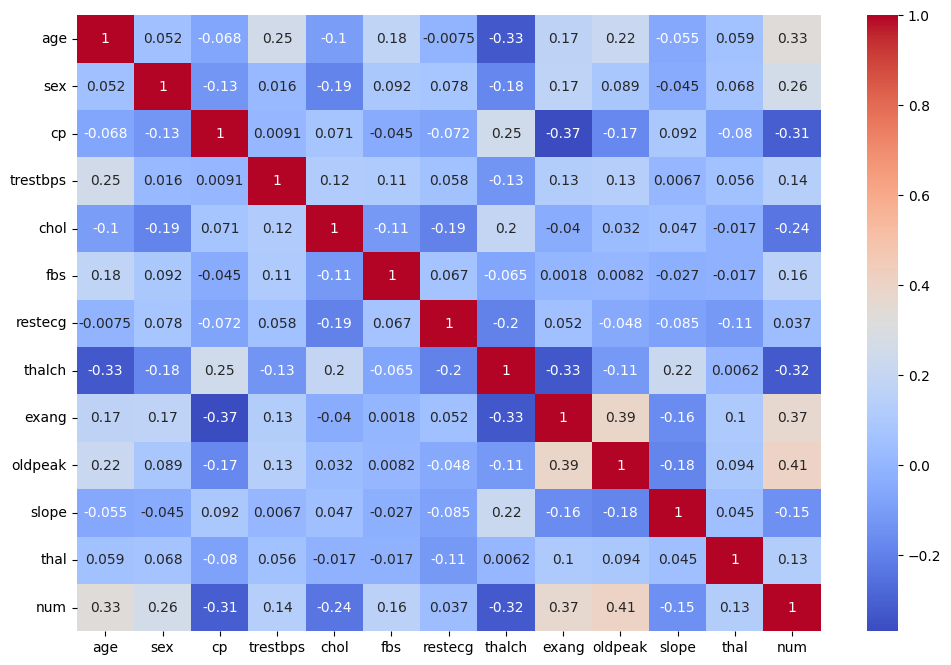

In [23]:
# Heatmap: visualize correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

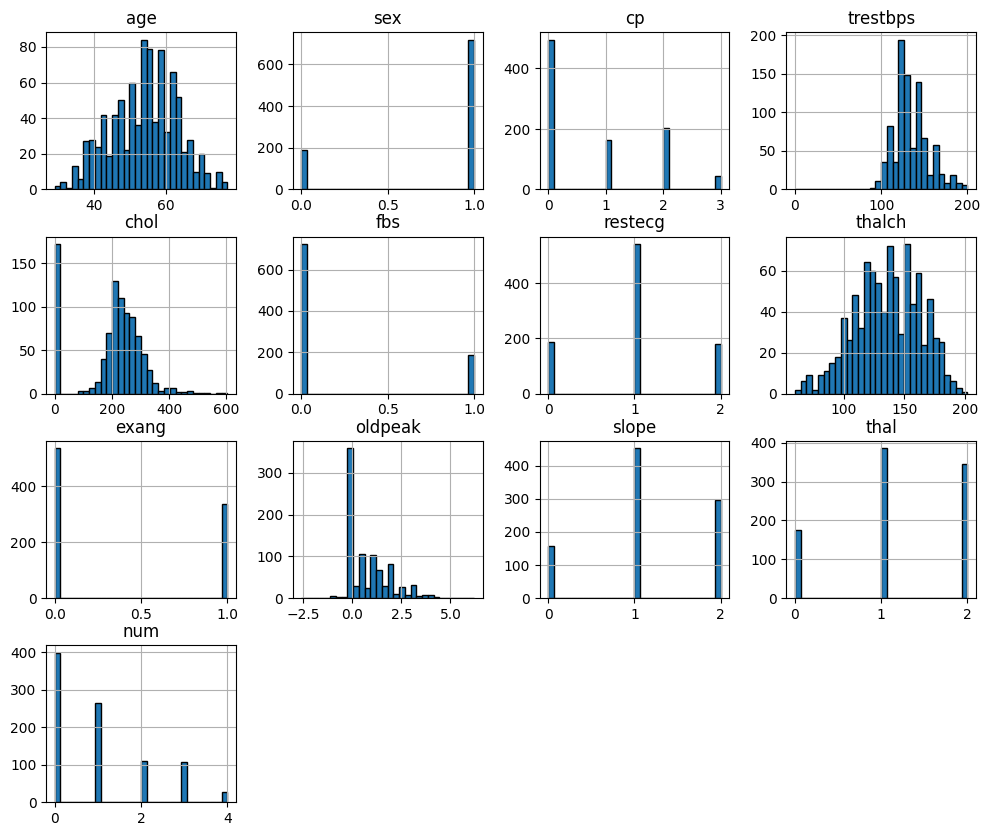

In [24]:
# Histogram plot for numerical columns
df.hist(bins=30, figsize=(12,10),edgecolor="black")
plt.show()

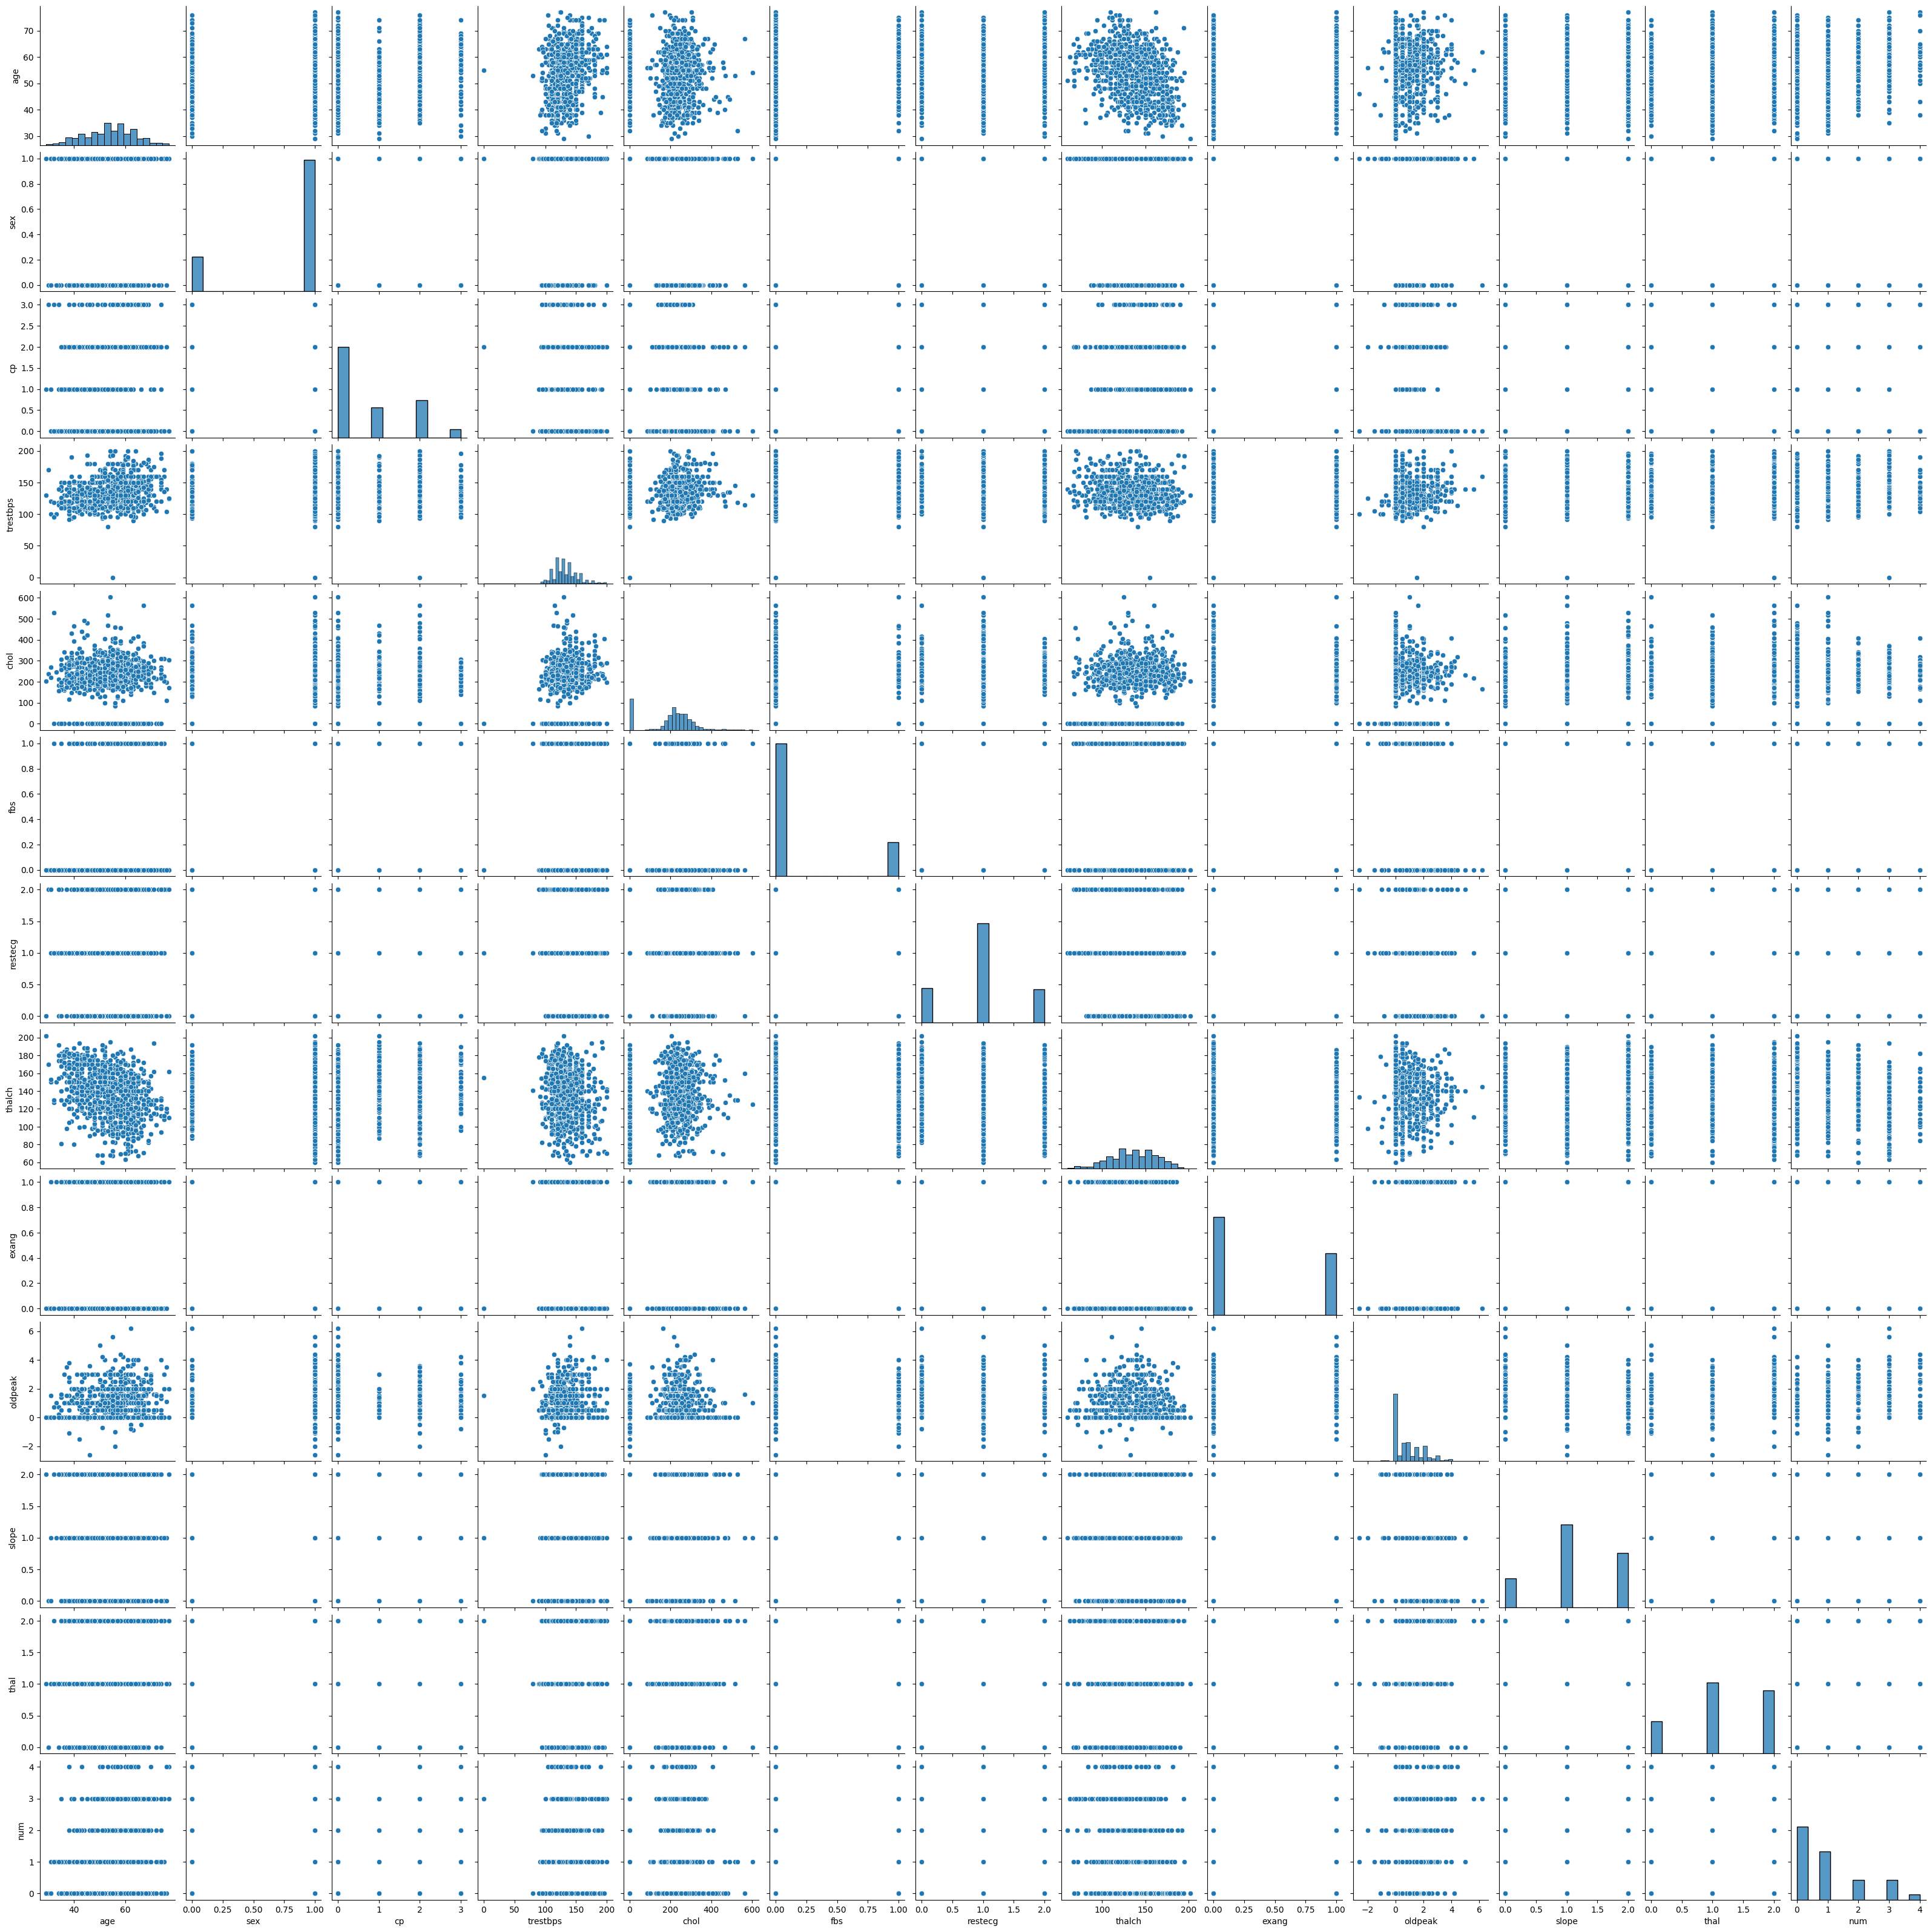

In [25]:
# Pair plot:
sns.pairplot(
    df,
)
plt.show()

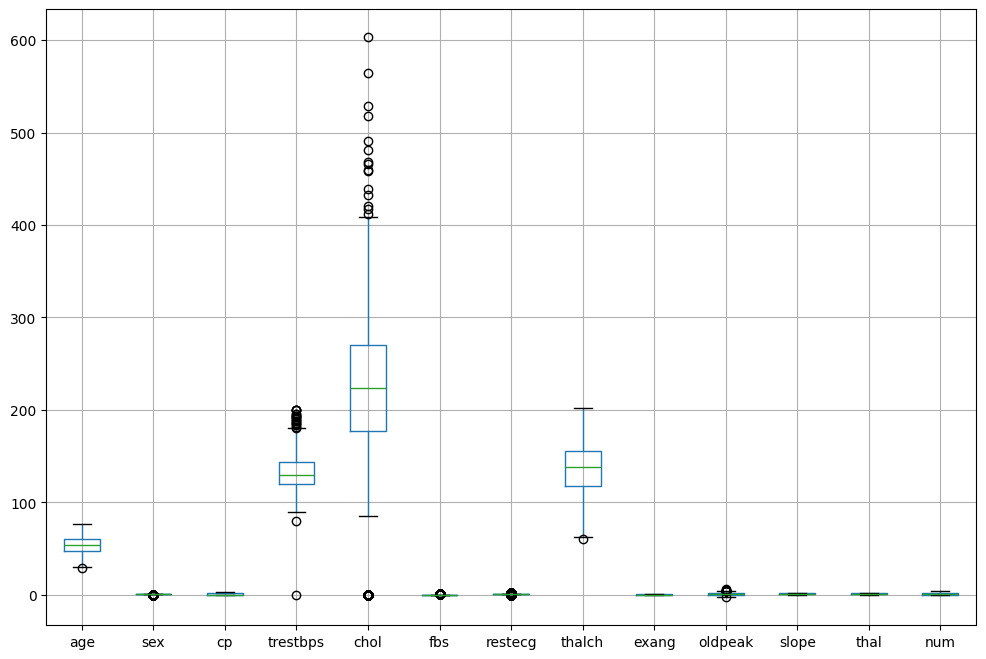

In [26]:
# outliers detected
df.boxplot(figsize=(12,8))
plt.show()

In `medical data` (like chol, trestbps, thalach, oldpeak) extreme values are clinically meaningful, and removing them would cause information loss and bias the decision tree.

In [27]:
target = "num"
# features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
#       'exang', 'oldpeak', 'slope', 'thal']

X = df.drop(columns=[target])
y = df[target]

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

 Decision Tree Classification

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X, y)

DecisionTreeClassifier(random_state=42)

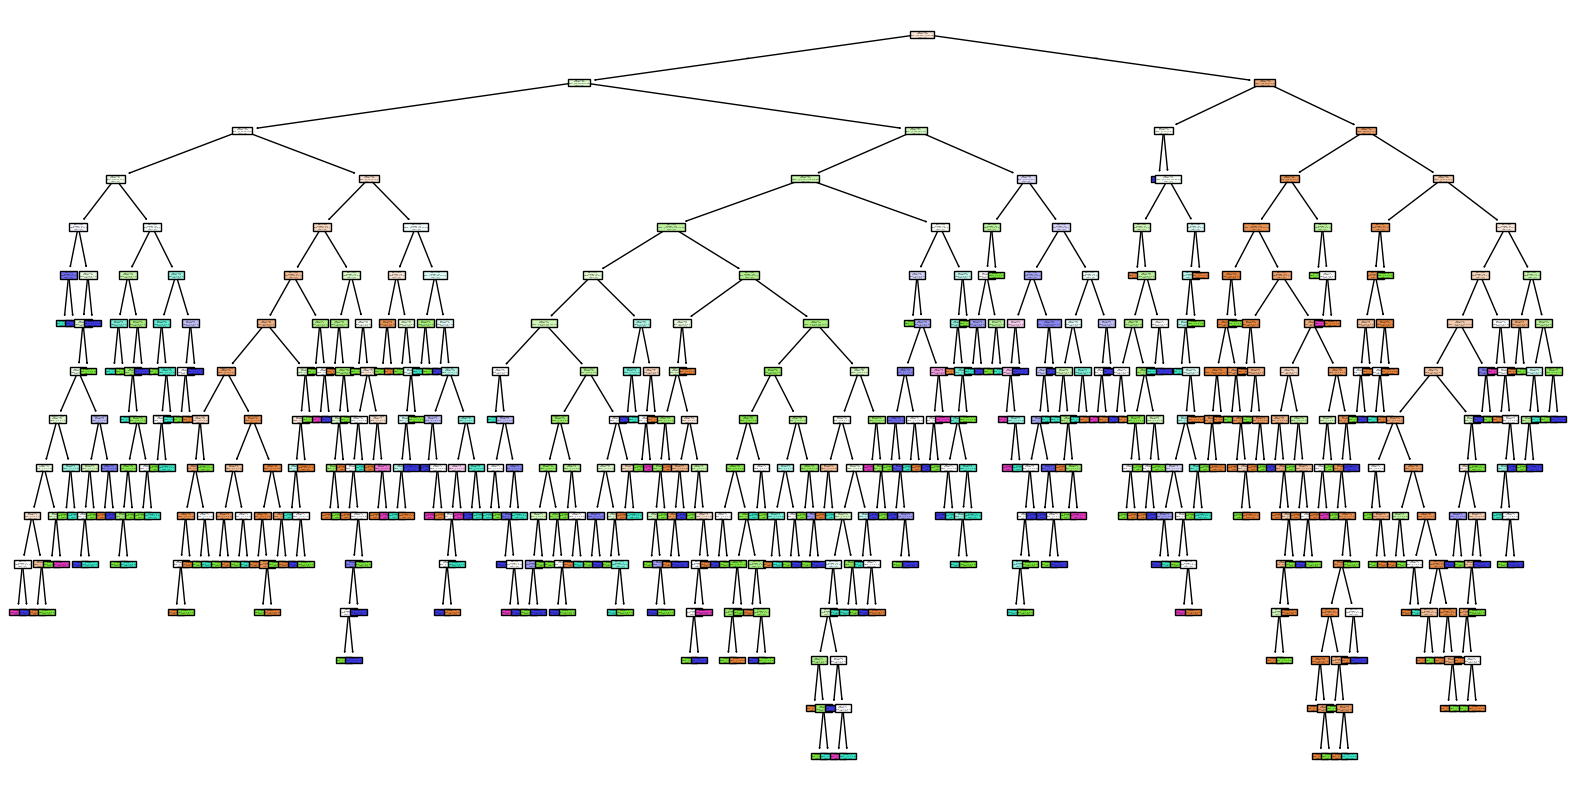

In [31]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    DT,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()

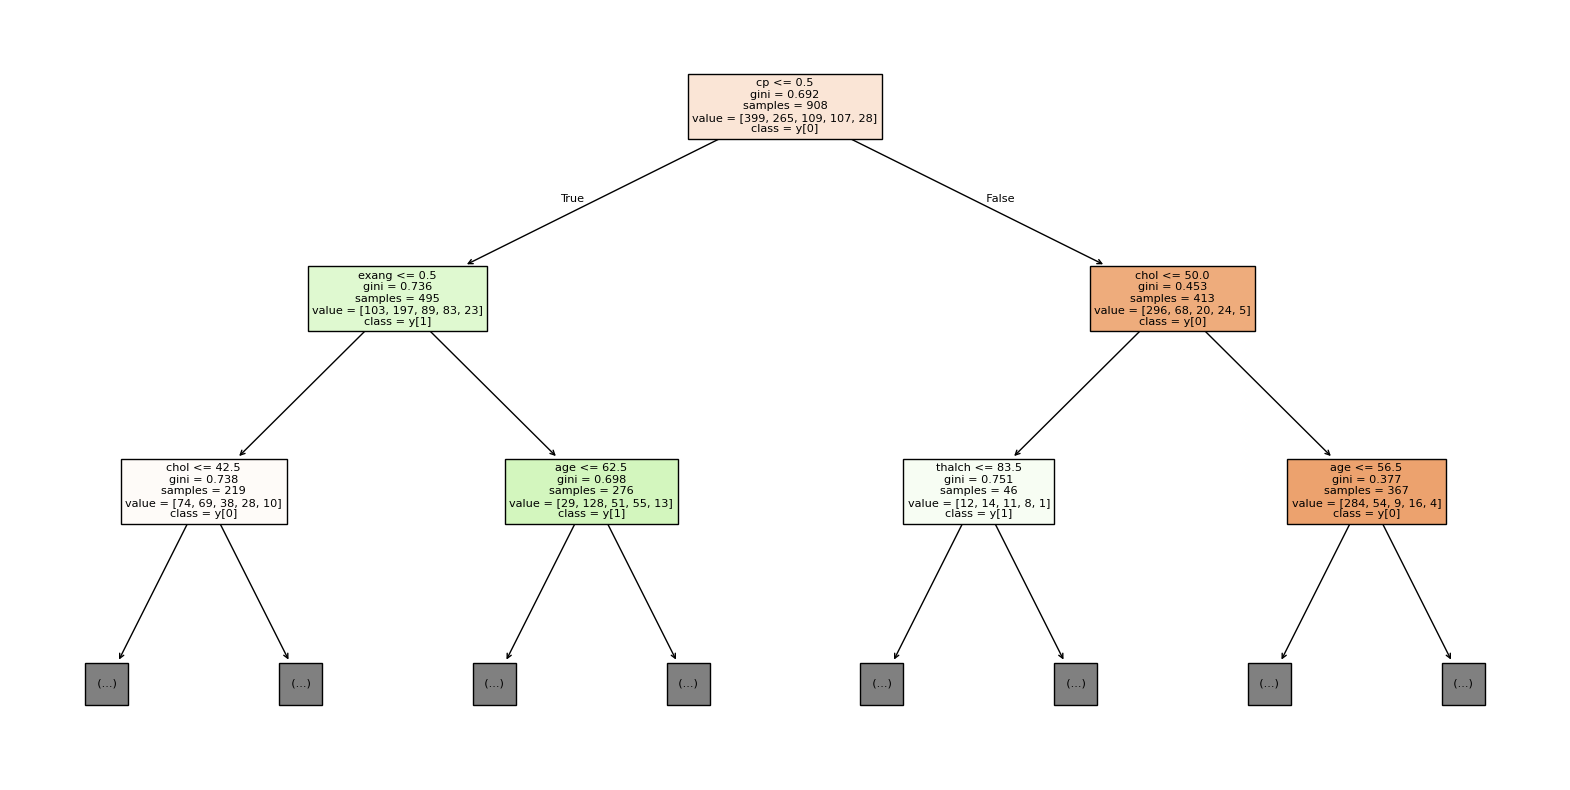

In [32]:
# only top levels
plt.figure(figsize=(20,10))
tree.plot_tree(
    DT,
    feature_names=X.columns,
    class_names=True,
    filled=True,
    max_depth=2
)
plt.show()


In [33]:
# Train-Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 12)
(182, 12)
(726,)
(182,)


In [35]:
# model Evaluation(traing and testing) - accuracy
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [36]:
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [37]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
y_pred = dec_tree.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.5054945054945055

In [40]:
# Hyperparameter Tuning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


In [41]:
grid_search= GridSearchCV(dec_tree,params)

In [42]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15),
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [43]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

Model Evaluation --  precision, recall, F1-score, ROC-AUC

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = dec_tree.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(
    y_test,
    dec_tree.predict_proba(X_test),
    multi_class='ovr',
    average='weighted'
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Precision: 0.4250218035932321
Recall: 0.5054945054945055
F1-score: 0.46087524106215694
ROC-AUC: 0.750508052778657


The tuned Decision Tree achieves moderate separability (ROC-AUC ≈ 0.75) but low predictive strength (Precision/F1 ≈ 0.42/0.46), it captures ranking well but fails on threshold-based predictions

Interview Questions:

`Problem 1`
What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

**Common hyperparameters of Decision Tree models and their effect:**

* **max_depth** → Controls tree depth; prevents overfitting when limited
* **min_samples_split** → Minimum samples to split a node; higher value reduces overfitting
* **min_samples_leaf** → Minimum samples in a leaf node; smoothens predictions
* **max_features** → Number of features considered per split; controls randomness and generalization
* **criterion (gini / entropy)** → Measures split quality; affects accuracy and purity of splits


`Problem 2` What is the difference between the Label encoding and One-hot encoding?

**Label Encoding:** Converts categories into integer labels (0,1,2,...), which may introduce false ordinal relationships and is suitable mainly for ordinal data.

**One-Hot Encoding:** Converts categories into binary columns (0/1), avoiding ordinal bias and is ideal for nominal data, though it increases dimensionality.